# **Task #4**

# **Hand Gesture Recognition Model**

# **Import Libraries:**

In [ ]:
import os
import numpy as np
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Import dataset from kaggle:**

In [ ]:
! mkdir ~/.kaggle.
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle.’: File exists
cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:24<00:00, 66.7MB/s]
100% 2.13G/2.13G [00:24<00:00, 91.9MB/s]


# **Extract from zipfile:**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leapgestrecog.zip', "r")
zip_ref.extractall('/content')
zip_ref.close()

#**Function to load images dataset:**

In [ ]:
def load_images(folder_path, img_size=(100, 100)):
    data = []
    labels = []
    gesture_classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    print("Gesture classes found:", gesture_classes)
    for i, gesture_class in enumerate(gesture_classes):
        class_path = os.path.join(folder_path, gesture_class)
        print("Processing class:", gesture_class)
        print("Class path:", class_path)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            print("Processing image:", img_path)
            img = Image.open(img_path)  # Open image using PIL
            img = img.convert('L')  # Convert to grayscale
            img = img.resize(img_size)  # Resize image
            img = np.array(img)  # Convert to numpy array
            data.append(img.flatten())  # Flatten image into 1D array
            labels.append(i)  # Assign label to the image
    return np.array(data), np.array(labels)



# **Load dataset:**

In [ ]:
dataset_paths = [
    '/content/leapGestRecog/00',
    '/content/leapGestRecog/01',
    '/content/leapGestRecog/02',
    '/content/leapGestRecog/03',
    '/content/leapGestRecog/04',
    '/content/leapGestRecog/05',
    '/content/leapGestRecog/06',
    '/content/leapGestRecog/07',
    '/content/leapGestRecog/08',
    '/content/leapGestRecog/09',
    # Add more dataset paths if needed
]

all_data = []
all_labels = []

for dataset_dir in dataset_paths:
    # Load images from the current dataset directory
    X, y = load_images(dataset_dir)

    # Append the loaded data and labels to the lists
    all_data.append(X)
    all_labels.append(y)

# Concatenate all data and labels into single arrays
X = np.concatenate(all_data, axis=0)
y = np.concatenate(all_labels, axis=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)


Streaming output truncated to the last 5000 lines.
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0006.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0089.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0168.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0044.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0113.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0041.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0182.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0093.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0163.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0062.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0151.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0071.png
Processing image: /content/leapGestRecog/07/10_down/frame_07_10_0014.png


# **Import and fit Model:**

In [ ]:
svm_model = SVC(kernel='linear')
model=svm_model.fit(X_train, y_train)


#**Define Function for predictions:**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color, transform

# Function to preprocess a single image
def preprocess_image(img_path, img_size=(100, 100)):
    img = Image.open(img_path)  # Open image using PIL
    img = img.convert('L')  # Convert to grayscale
    img = img.resize(img_size)  # Resize image
    img = np.array(img)  # Convert to numpy array
    img = img.flatten()  # Flatten image into 1D array
    return img

# Function to make a prediction on a single image
def predict_image(model, img_path):
    # Preprocess the image
    img = preprocess_image(img_path)
    # Reshape the image to match the input shape expected by the model
    img = img.reshape(1, -1)
    # Make prediction
    prediction = model.predict(img)
    # Check if the image exists
    if not os.path.exists(img_address):
      print("Error: The specified image address does not exist.")
    else:
       # Load and display the image
      img = Image.open(img_address)
      plt.imshow(img)
      plt.axis('off')
      plt.show()

    # Make prediction using the trained model

    # Print the predicted label
    if prediction ==1:
      print("Given image  is a thumb :", prediction)
    elif prediction ==2:
      print("Given image  is a L shape:", prediction)
    elif prediction ==3:
      print("Given image  is a  ok shape:", prediction)

    elif prediction ==5:
      print("Given image  is a  Down :", prediction)
    elif prediction ==6:
      print("Given image  is a  index :", prediction)
    elif prediction ==7:
      print("Given image  is a  fist moved :", prediction)
    elif prediction ==8:
      print("Given image  is a  palm moved :", prediction)
    elif prediction ==9:
      print("Given image  is a  Palm :", prediction)
    elif prediction ==0:
      print("Given image  is a fist :", prediction)
    elif prediction ==4:
      print("Given image  is a  C shape:", prediction)
    else:
      print("No Prediction",prediction)




# **Model Testing:**

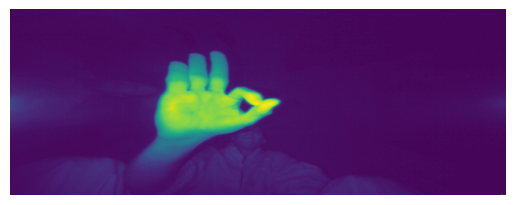

Given image  is a  ok shape: [3]


In [ ]:
# Get the address of the image from the user
img_address = r'/content/leapGestRecog/01/07_ok/frame_01_07_0047.png'
prediction = predict_image(model, img_address)


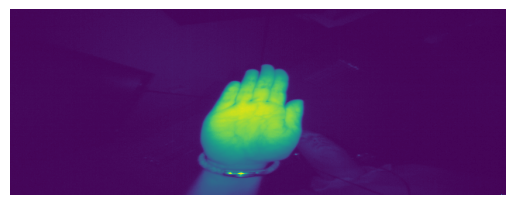

Given image  is a  Palm : [9]


In [ ]:
# Get the address of the image from the user
img_address = r'/content/leapGestRecog/08/01_palm/frame_08_01_0008.png'
prediction = predict_image(model, img_address)


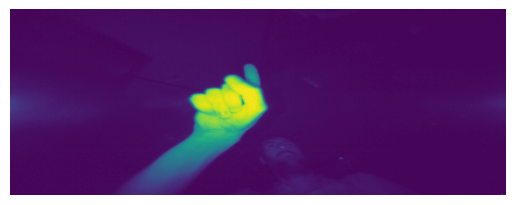

Given image  is a  index : [6]


In [ ]:
# Get the address of the image from the user
img_address = r'/content/leapGestRecog/03/06_index/frame_03_06_0003.png'
prediction = predict_image(model, img_address)


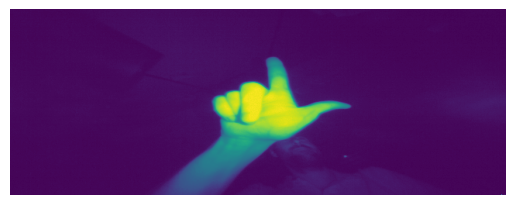

Given image  is a L shape: [2]


In [ ]:
# Get the address of the image from the user
img_address = r'/content/leapGestRecog/03/02_l/frame_03_02_0052.png'
prediction = predict_image(model, img_address)


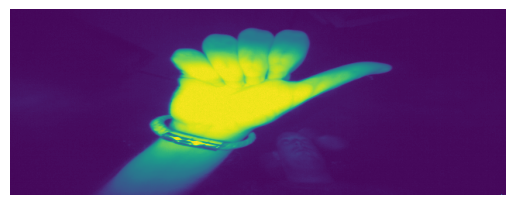

Given image  is a thumb : [1]


In [ ]:
# Get the address of the image from the user
img_address = r'/content/leapGestRecog/08/05_thumb/frame_08_05_0005.png'

prediction = predict_image(model, img_address)


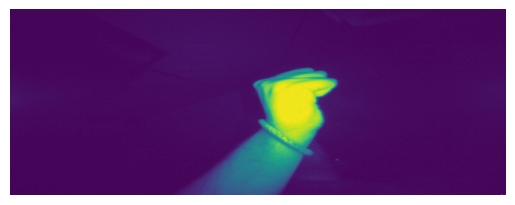

Given image  is a  fist moved : [7]


In [ ]:
img_address = r'/content/leapGestRecog/08/04_fist_moved/frame_08_04_0004.png'

prediction = predict_image(model, img_address)


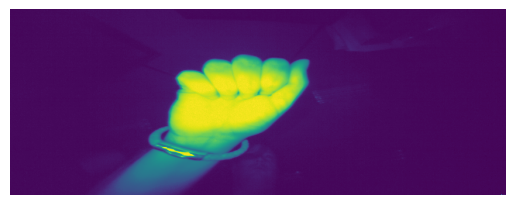

Given image  is a fist : [0]


In [ ]:
img_address = r'/content/leapGestRecog/08/03_fist/frame_08_03_0006.png'

prediction = predict_image(model, img_address)


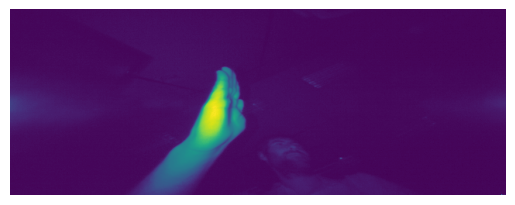

Given image  is a  palm moved : [8]


In [ ]:
img_address = r'/content/leapGestRecog/03/08_palm_moved/frame_03_08_0001.png'

prediction = predict_image(model, img_address)


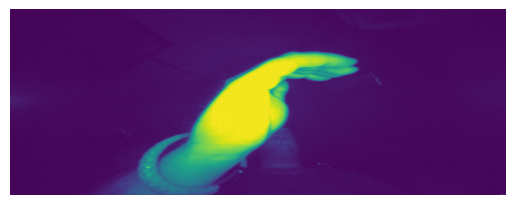

Given image  is a  C shape: [4]


In [ ]:
img_address = r'/content/leapGestRecog/08/09_c/frame_08_09_0008.png'

prediction = predict_image(model, img_address)


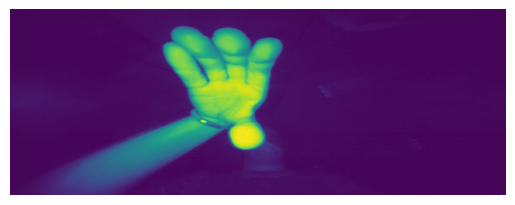

Given image  is a  Down : [5]


In [ ]:
img_address = r'/content/leapGestRecog/08/10_down/frame_08_10_0019.png'

prediction = predict_image(model, img_address)


In [ ]:
yhat=model.predict(X_test)

#**Model Evaluation:**

In [ ]:
from sklearn.metrics import r2_score
(r2_score(y_test,yhat))*100

99.89696969696969

#**Thank You**